<a href="https://colab.research.google.com/github/nidhirathod15/projects/blob/main/pmanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PM2.5 Time Series** **Analyzer (Based on India's Air Quality)**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airqualityindia.csv to airqualityindia.csv


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/airqualityindia.csv')  # replace with your filename
# Specify the format of your timestamps
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df = df.sort_values('Timestamp')
df.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create date range widget
min_date = df['Timestamp'].min().date()
max_date = df['Timestamp'].max().date()

start_date = widgets.DatePicker(value=min_date, description='Start:')
end_date = widgets.DatePicker(value=max_date, description='End:')

display(start_date, end_date)


# Filter dataframe based on widget input
mask = (df['Timestamp'].dt.date >= start_date.value) & (df['Timestamp'].dt.date <= end_date.value)
df_filtered = df.loc[mask]

# Quick check
df_filtered.head()

DatePicker(value=datetime.date(2017, 11, 7), description='Start:')

DatePicker(value=datetime.date(2022, 6, 4), description='End:')

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


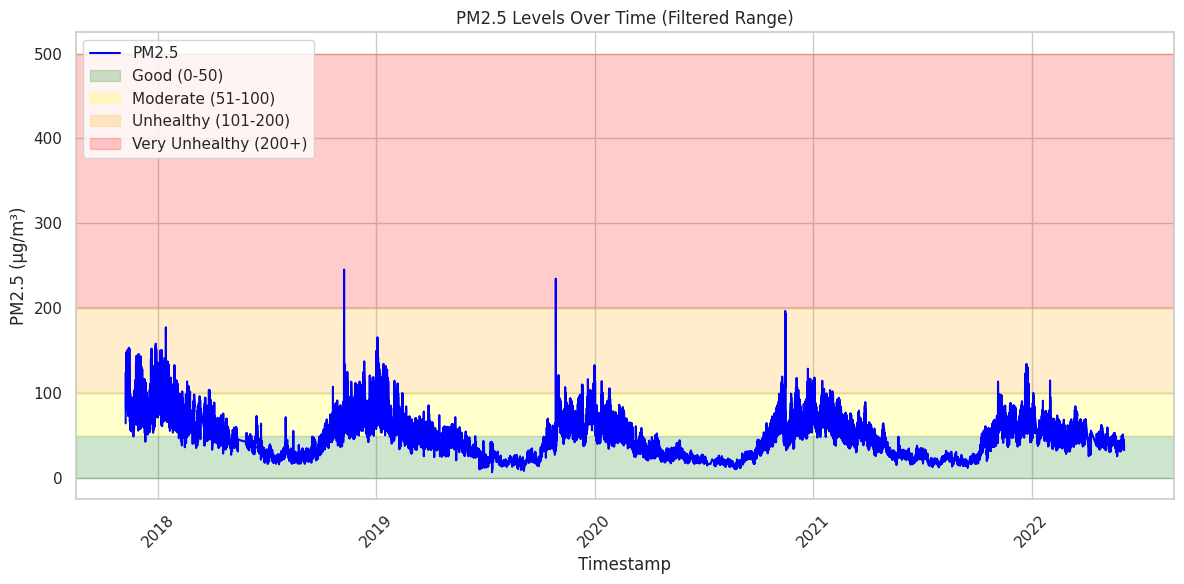

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(x='Timestamp', y='PM2.5', data=df_filtered, color='blue', label='PM2.5')

# Add thresholds
plt.axhspan(0, 50, color='green', alpha=0.2, label='Good (0-50)')
plt.axhspan(51, 100, color='yellow', alpha=0.2, label='Moderate (51-100)')
plt.axhspan(101, 200, color='orange', alpha=0.2, label='Unhealthy (101-200)')
plt.axhspan(201, 500, color='red', alpha=0.2, label='Very Unhealthy (200+)')

plt.title("PM2.5 Levels Over Time (Filtered Range)")
plt.xlabel("Timestamp")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-8-a38b35909224>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='PM2.5', data=month_avg, palette='magma')


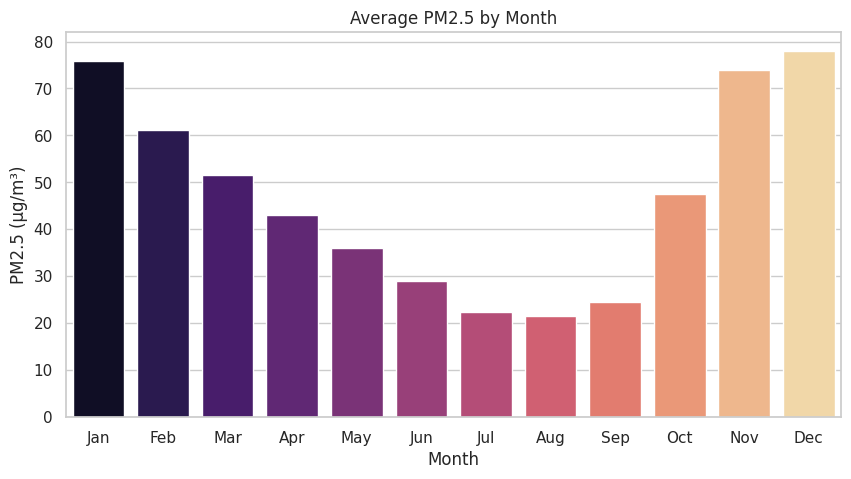

In [ ]:
df['Month'] = df['Timestamp'].dt.strftime('%b')  # Abbreviated month name
df['Month_Num'] = df['Timestamp'].dt.month       # For sorting
month_avg = df.groupby(['Month', 'Month_Num'])['PM2.5'].mean().reset_index()
month_avg = month_avg.sort_values('Month_Num')

plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='PM2.5', data=month_avg, palette='magma')
plt.title("Average PM2.5 by Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("Month")
plt.show()

<ipython-input-9-4e3a1b8adeb6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_avg.index, y=hourly_avg.values, palette="coolwarm")


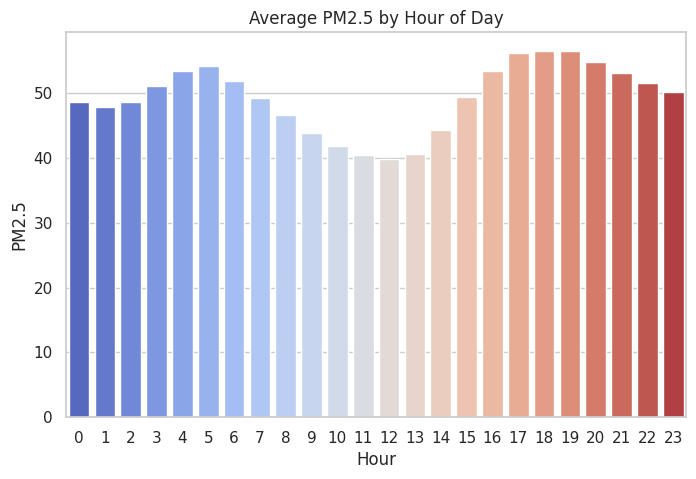

In [ ]:
df['Hour'] = df['Timestamp'].dt.hour
hourly_avg = df.groupby('Hour')['PM2.5'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=hourly_avg.index, y=hourly_avg.values, palette="coolwarm")
plt.title("Average PM2.5 by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.show()

**Output: Developed an interactive Air Quality Analysis Tool using Google Colab, enabling users to filter date ranges, visualize PM2.5 trends with thresholds, and explore monthly/hourly pollution patterns with Matplotlib, Seaborn, and ipywidgets.**